
<h1 style="font-family:verdana;"> <center>🌞Análise/Previsão do Tempo em Saquarema- Rio de  Janeiro ⛅</center> </h1>

***

<div style="text-align:center;">
    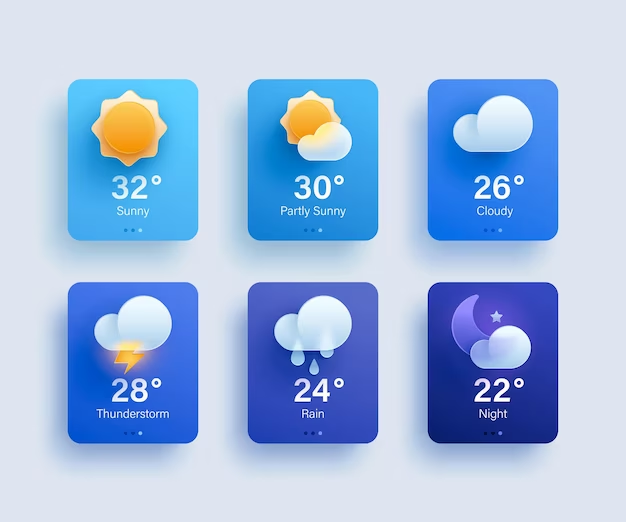
</div>
<h3  style="text-align:center;"><span class="label label-success">Pré-processamento dos dados</span> <span class="label label-success">Análise Exploratória(EDA)</span> <span class="label label-success">Feature Engineering</span> <span class="label label-success">Modelagem</span> <span class="label label-success">Avaliação do Modelo</span></h3>



A análise e previsão do comportamento temporal em uma cidade é um projeto de grande relevância para diversos setores. As informações sobre o clima são cruciais para tomadas de decisão por parte do governo, empresas e cidadãos.O objetivo principal deste projeto é realizar uma análise aprofundada dos dados temporais do município de Saquarema no Rio de Janeiro e criar modelos de previsão da temperatura. O dataset utilizado foi encontrado no Kaggle e pode ser acessado [aqui](http://www.kaggle.com/datasets/PROPPG-PPG/hourly-weather-surface-brazil-southeast-region),se tratam de dados coletados pelo próprio INMET (Instituto Nacional de Meteorologia do Brasil). 

**-IMPORTANDO BIBLIOTECAS**

In [93]:

import numpy as np
import pandas as pd 
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from prophet.diagnostics import performance_metrics
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")


# **-PRÉ-PROCESSAMENTO DOS DADOS**

**-AQUISIÇÃO DOS DADOS**

In [94]:
df=pd.read_csv('/kaggle/input/hourly-weather-surface-brazil-southeast-region/southeast.csv')



**-TIPOS DE DADO**

Para trabalhar com séries temporais é preciso passar as features de data para o formato DateTime. Além disso, como o dataset é muito grande e nossa análise vai ser focada na temperatura e na chuva da cidade de Saquarema, nessa etapa também foi filtrada as informações necessárias.

In [95]:
df.dtypes

index                                                      int64
Data                                                      object
Hora                                                      object
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                         float64
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)    float64
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)          float64
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)         float64
RADIACAO GLOBAL (Kj/m²)                                    int64
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)             float64
TEMPERATURA DO PONTO DE ORVALHO (°C)                     float64
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)               float64
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)               float64
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)         float64
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)         float64
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                   int64
UMIDADE REL. MIN. NA HORA

In [96]:
#passando as features para formato Datetime
df['data_hora'] = pd.to_datetime(df['Data'] + ' ' + df['Hora'])
df['Data']= pd.to_datetime(df['Data'], format='%Y/%m/%d')
#filtrando as informações
filtered_df = df[['Data', 'data_hora','TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)','station','PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']]
filtered_df['station'].unique()


array(['ECOLOGIA AGRICOLA', 'BAURU', 'UBERLANDIA', 'ALMENARA',
       'CAMPOS DO JORDAO', 'MONTES CLAROS', 'MARAMBAIA', 'BARBACENA',
       'ARAXA', 'XEREM', 'CAMBUCI', 'FRANCA', 'PRESIDENTE PRUDENTE',
       'MONTE VERDE', 'VICOSA', 'CONCEICAO DAS ALAGOAS', 'PATROCINIO',
       'SAO PAULO - MIRANTE', 'SACRAMENTO', 'RESENDE', 'ITUIUTABA',
       'LINS', 'TIMOTEO', 'SAO MIGUEL ARCANJO', 'SERRA DOS AIMORES',
       'VALENCA', 'VITORIA', 'AVARE', 'TAUBATE', 'OURO BRANCO',
       'PAMPULHA', 'FORMIGA', 'CAMPINA VERDE', 'MACAE', 'CALDAS',
       'SAO CARLOS', 'OURINHOS', 'MARIA DA FE', 'VOTUPORANGA', 'ALEGRE',
       'ARRAIAL DO CABO', 'MURIAE', 'TRES MARIAS', 'SOROCABA', 'CAMPOS',
       'ALFREDO CHAVES', 'ITAPEVA', 'PASSOS', 'CURVELO', 'PARATI',
       'RANCHARIA', 'SAO JOAO DEL REI', 'TERESOPOLIS', 'PIRACICABA',
       'TEOFILO OTONI', 'IGUAPE', 'VARGINHA', 'PICO DO COUTO',
       'SAO MATEUS', 'LINHARES', 'PIRAPORA', 'SANTA TERESA',
       'VILA MILITAR', 'DORES DO INDAIA', 'AIMORES', '

In [97]:
#printando o novo Dataframe
df=filtered_df[filtered_df['station']=='SAQUAREMA']
df.sample(10)

,Data,data_hora,"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",station,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"
10272320,2017-09-06,2017-09-06 20:00:00,22.3,SAQUAREMA,0.0
9338663,2016-01-16,2016-01-16 19:00:00,25.8,SAQUAREMA,0.0
9343928,2016-08-23,2016-08-23 04:00:00,16.2,SAQUAREMA,0.0
11635904,2018-01-17,2018-01-17 13:00:00,30.7,SAQUAREMA,0.0
11635758,2018-01-11,2018-01-11 11:00:00,25.8,SAQUAREMA,0.0
11637205,2018-03-12,2018-03-12 18:00:00,30.7,SAQUAREMA,0.0
8601141,2015-11-06,2015-11-06 20:00:00,24.2,SAQUAREMA,0.2
8601612,2015-11-26,2015-11-26 11:00:00,23.9,SAQUAREMA,0.0
8601709,2015-11-30,2015-11-30 12:00:00,25.9,SAQUAREMA,0.0
10271179,2017-07-21,2017-07-21 07:00:00,19.5,SAQUAREMA,0.0


In [98]:
#analisando as anomalias
df.describe()

,"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)","PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"
count,29208.000000,29208.000000
mean,-522.393837,-544.180033
std,2274.614795,2268.627536
min,-9999.000000,-9999.000000
25%,20.000000,0.000000
50%,22.900000,0.000000
75%,25.900000,0.000000
max,38.200000,53.000000


In [99]:

df['erro'] = df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'] == -9999.0
df.groupby(df['Data'].dt.year)['erro'].sum()

Data
2015     38
2016    826
2017    671
2018     56
Name: erro, dtype: int64

Esses valores -9999.0 encontrados representam um erro na verdade, que provavelmente vieram de dados faltantes que foram substituídos.Como eles são muitos(cerca de 10% do ano de 2016) e não se parecem em nada com os dados reais, eles atrapalham bastante a nossa análise, como pode ser observado no gráfico abaixo do recorte do ano de 2016. 

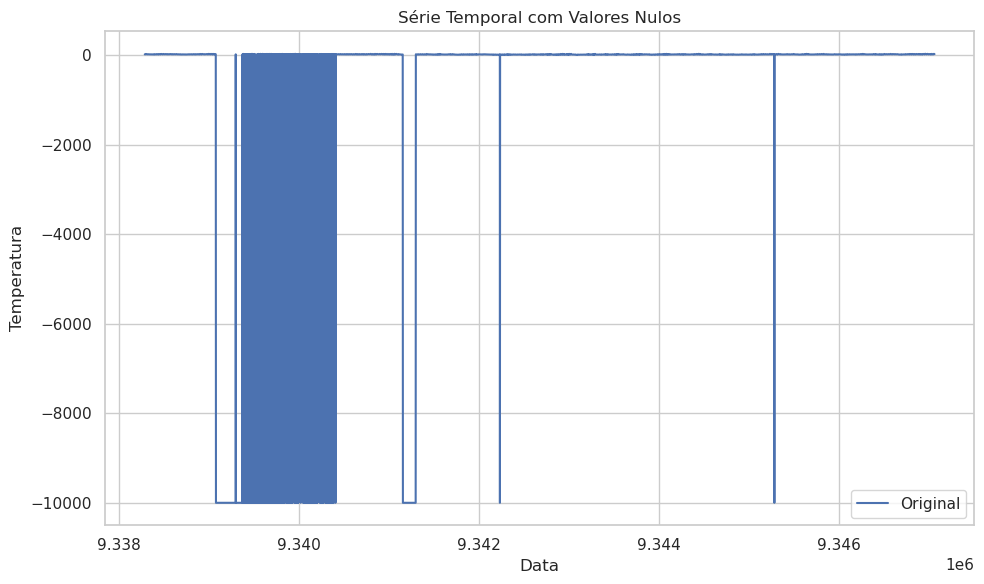

In [100]:
#recortando o dataframe do ano de 2016
df_2016 = df[(df['Data'] >= '2016-01-01') & (df['Data'] <= '2016-12-31')]
# Configurar o estilo Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plotar série temporal com as anomalias
sns.lineplot(data=df_2016['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'], label='Original')
plt.title('Série Temporal com Valores Nulos')
plt.xlabel('Data')
plt.ylabel('Temperatura')
plt.legend()
plt.tight_layout()
plt.show()

Uma opção para tentar corrigir esse problema , é usar **interpolação linear** para substituir esses valores com base nos valores vizinhos.

In [101]:
#substituindo as anomalias por valores NaN
df = df.replace(-9999.0, np.nan)
df.isna().sum()

Data                                               0
data_hora                                          0
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)    1591
station                                            0
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                1590
erro                                               0
dtype: int64

In [102]:
# Preenchendo valores nulos usando interpolação linear
df['temperatura'] =df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].interpolate()
df['precipitacao']= df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].interpolate()
# Preenchendo valores nulos remanescentes usando o ultímo dado 
df['temperatura'].fillna(method='bfill', inplace=True)
df['precipitacao'].fillna(method='bfill', inplace=True)

In [103]:
df.isna().sum()

Data                                               0
data_hora                                          0
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)    1591
station                                            0
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                1590
erro                                               0
temperatura                                        0
precipitacao                                       0
dtype: int64

Agora com o plot dos mesmo dados após a interpolação, vemos que houve uma grande melhora, permitindo agora ser trabalhada. 

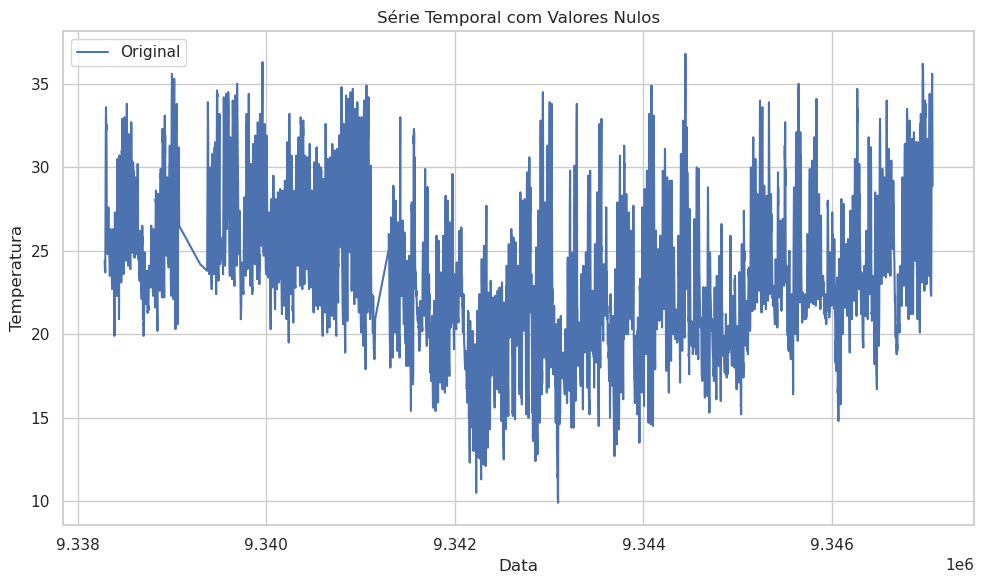

In [104]:
#recortando o dataframe do ano de 2016
df_2016 = df[(df['Data'] >= '2016-01-01') & (df['Data'] <= '2016-12-31')]
# Configurar o estilo Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))


# Plotar série temporal com as anomalias
sns.lineplot(data=df_2016['temperatura'], label='Original')
plt.title('Série Temporal com Valores Nulos')
plt.xlabel('Data')
plt.ylabel('Temperatura')
plt.legend()
plt.tight_layout()
plt.show()

# **-ANÁLISE EXPLORATÓRIA (EDA)**

Uma análise interessante é observar o gráfico da temperatura ao longo desses 4 anos de registro, mas os dados separados por hora ficam muito ruidosos, por isso, vamos agrupá-los por dia apenas. Note nos gráficos abaixo  que o ano de 2015 destoa dos outros porque os dados já começam na metade do ano, observe  também como o gráfico dos outros anos respeitam uma mesma silhueta, essa é a sazonalidade, causada pelas estações do ano, onde para nós no Brasil o meio do ano é mais frio devido ao inverno. 

In [105]:
df.reset_index(inplace=True)
# Definindo a coluna de data como índice
df.set_index('Data', inplace=True)

# Agrupando os dados por dia e calcular a média das temperaturas
daily_df = df.resample('D').mean()

# Separando os dados por ano
grouped_by_year = daily_df.groupby(daily_df.index.year)

# Transformando o groupby em um DataFrame
grouped_by_year_df = grouped_by_year.apply(lambda x: x.reset_index(drop=True))

grouped_by_year_df

index  TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)  \
Data                                                                 
2015 0     8599572.5                                           NaN   
     1     8599596.5                                     22.309091   
     2     8599620.5                                     21.012500   
     3     8599644.5                                     19.079167   
     4     8599668.5                                     20.408333   
...              ...                                           ...   
2018 360  11644158.5                                     24.108333   
     361  11644182.5                                     25.308333   
     362  11644206.5                                     25.775000   
     363  11644230.5                                     25.708333   
     364  11644254.5                                     25.704167   

          PRECIPITAÇÃO TOTAL, HORÁRIO (mm)      erro  temperatura  \
Data                                                                
2015 0                                 NaN  1.000000    23.600000   
     1                            0.000000  0.541667    23.008333   
     2                            0.066667  0.000000    21.012500   
     3                            0.433333  0.000000    19.079167   
     4                            0.050000  0.000000    20.408333   
...                                    ...       ...          ...   
2018 360                          0.000000  0.000000    24.108333   
     361                          0.000000  0.000000    25.308333   
     362                          0.000000  0.000000    25.775000   
     363                          0.000000  0.000000    25.708333   
     364                          0.000000  0.000000    25.704167   

          precipitacao  
Data                    
2015 0        0.000000  
     1        0.000000  
     2        0.066667  
     3        0.433333  
     4        0.050000  
...                ...  
2018 360      0.000000  
     361      0.000000  
     362      0.000000  
     363      0.000000  
     364      0.000000  

[1217 rows x 6 columns]

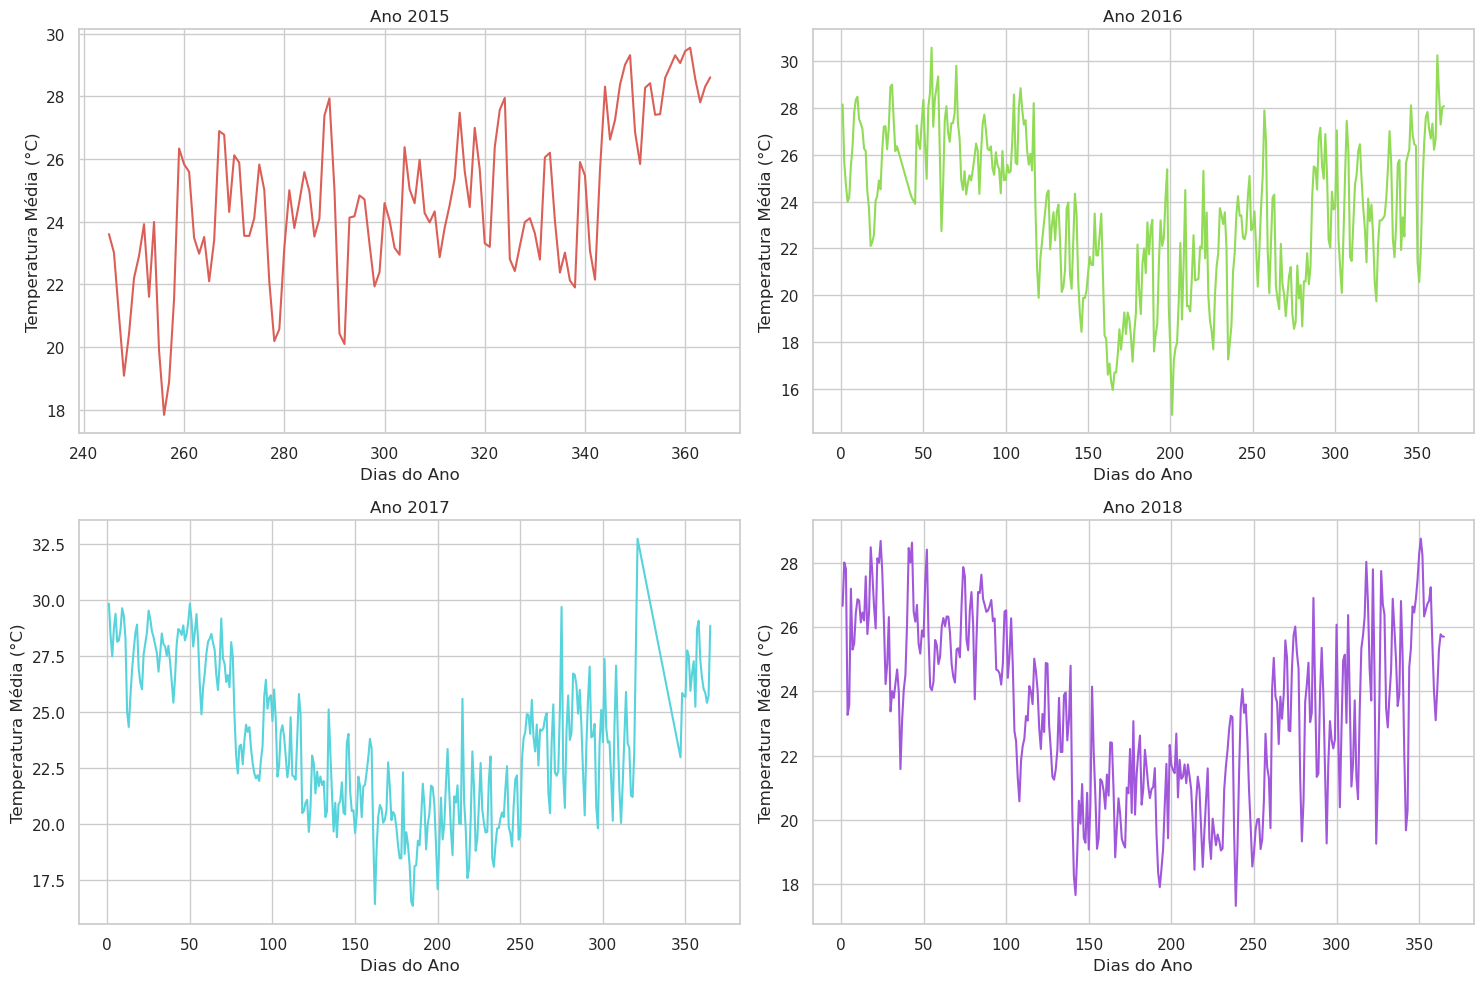

In [106]:

# Configurando subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
palette = sns.color_palette("hls", 4)

# Plotar cada ano em um subplot separado
sns.lineplot(x=grouped_by_year.get_group(2015).index.dayofyear, 
             y=grouped_by_year.get_group(2015)['temperatura'], 
             color=palette[0], ax=axes[0, 0])
axes[0, 0].set_title('Ano 2015')
axes[0, 0].set_xlabel('Dias do Ano')
axes[0, 0].set_ylabel('Temperatura Média (°C)')

sns.lineplot(x=grouped_by_year.get_group(2016).index.dayofyear, 
             y=grouped_by_year.get_group(2016)['temperatura'], 
             color=palette[1], ax=axes[0, 1])
axes[0, 1].set_title('Ano 2016')
axes[0, 1].set_xlabel('Dias do Ano')
axes[0, 1].set_ylabel('Temperatura Média (°C)')

sns.lineplot(x=grouped_by_year.get_group(2017).index.dayofyear, 
             y=grouped_by_year.get_group(2017)['temperatura'], 
             color=palette[2], ax=axes[1, 0])
axes[1, 0].set_title('Ano 2017')
axes[1, 0].set_xlabel('Dias do Ano')
axes[1, 0].set_ylabel('Temperatura Média (°C)')

sns.lineplot(x=grouped_by_year.get_group(2018).index.dayofyear, 
             y=grouped_by_year.get_group(2018)['temperatura'], 
             color=palette[3],ax=axes[1, 1])
axes[1, 1].set_title('Ano 2018')
axes[1, 1].set_xlabel('Dias do Ano')
axes[1, 1].set_ylabel('Temperatura Média (°C)')

plt.tight_layout()
plt.show()

Outra visualização interessante é o gráfico de chuva ao longo dos meses em cada ano. Note que  apesar da fama, março não é o mês mais chuvoso,normalmente é janeiro, mas também faz parte dos meses mais chuvosos pois faz parte do verão.Além disso, chama muita atenção os meses de fevereiro de 2018 e junho de 2017 por serem muito maiores que nos outros anos. E pesquisando para confirmar, vi que de fato foram meses muito atípicos e que bateram recordes em muitos anos, em 2018 em algumas partes do Rio de Janeiro chegou a chover 42x mais que nos anos anteriores, e em junho de 2017 foi a maior chuva registrada do mês em 20 anos. 

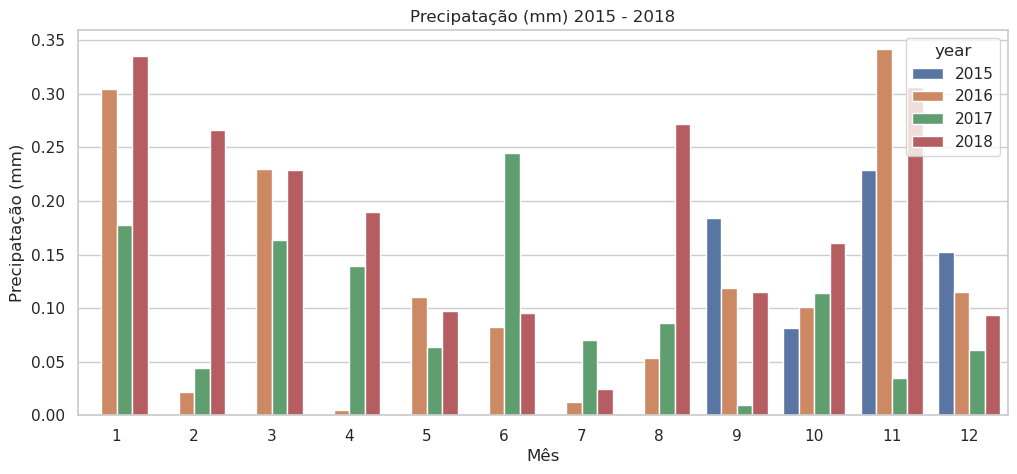

In [107]:
# Calcular a precipitação total mensal por ano
chuva = daily_df.groupby([daily_df.index.year, daily_df.index.month])['precipitacao'].mean()
chuva.index.names = ['year', 'month']

# Selecionar os anos de interesse
chuva = chuva.loc[[2015, 2016, 2017, 2018]]

# Criar um DataFrame para o gráfico de barras
chuva_por_mes = pd.DataFrame({'Precipitação (mm)': chuva}).reset_index()

# Plotar o gráfico de barras
plt.figure(figsize=(12, 5))
sns.barplot(x='month', y='Precipitação (mm)', hue='year', data=chuva_por_mes)
plt.title('Precipatação (mm) 2015 - 2018')
plt.xlabel('Mês')
plt.ylabel('Precipatação (mm)')
plt.show()

**-BASELINE**

Para avaliarmos a eficácia do nosso modelo de previsão de temperatura, é crucial não apenas considerar métricas apropriadas, mas também estabelecer uma referência para comparação. Esse ponto é abordado pela seleção de um modelo baseline, que servirá como ponto de referência para nossa análise.O modelo escolhido como baseline é o SARIMA (Seasonal Autoregressive Integrated Moving Average), um modelo clássico amplamente utilizada para análise de séries temporais.

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


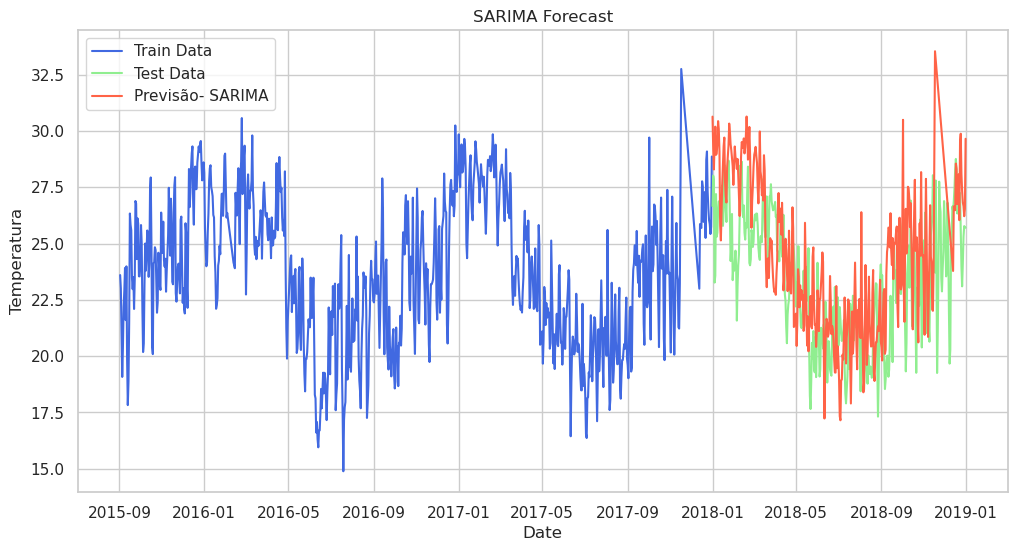

In [108]:
train_data = daily_df['2016-12-31':'2017-12-31']['temperatura']
test_data = daily_df['2018-01-01':'2018-12-31']['temperatura']

# Ajustando o modelo SARIMA aos dados de treinamento
order = (0, 1, 0)
seasonal_order = (0, 1, 0, 365)
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order, enforce_stationarity=False)
results = model.fit()

# Fazendo previsões para o ano de 2018
forecast = results.get_forecast(steps=len(test_data))
predicted_mean = forecast.predicted_mean

# Plotando as previsões e os dados reais
plt.figure(figsize=(12, 6))
plt.plot(daily_df[:'2017-12-31']['temperatura'].index, daily_df[:'2017-12-31']['temperatura'].values, label='Train Data',color='royalblue')
plt.plot(test_data.index, test_data.values, label='Test Data',color='lightgreen')
plt.plot(test_data.index, predicted_mean, label='Previsão- SARIMA',color='tomato')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Temperatura')
plt.title('SARIMA Forecast')
plt.show()

**-MÉTRICAS**

Neste projeto, nosso foco estará na seleção e análise das métricas de avaliação MAPE (Mean Absolute Percentage Error),que expressa o erro médio percentual absoluto entre os valores previstos e os valores reais, e o RMSE (Root Mean Squared Error), que calcula a raiz quadrada da média dos erros quadráticos entre os valores reais e previstos, penalizando mais erros maiores. Para ambas, quanto menor o valor mais acurado está o modelo.

In [109]:

# Calculando o RMSE da nossa baseline
mse = mean_squared_error(test_data, predicted_mean)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')


RMSE: 3.068671410982851


In [110]:
# Calculando o MAPE da nossa baseline

percentage_errors = ((test_data - predicted_mean) / test_data) * 100
mape = np.mean(np.abs(percentage_errors))
print(f'MAPE: {mape}')

MAPE: 10.790983080211038


# **-MODELAGEM COM PROPHET**

O Prophet foi o modelo escolhido para tentar superar a baseline, ele  é um modelo de time series, desonvolvido pelo Facebook, que permite alguns ajustes interessantes, como passar 'changepoints' manualmente, que são datas em que o modelo considera possíveis pontos de mudança nos padrões, permitindo que ele adapte os componentes do modelo de acordo, no nosso caso, passar as estações do ano em forma de changepoints melhorou a performance do modelo. Além disso o prophet permite passar feriados e sazonalidades que podem ajudar o ajuste do modelo, de padrâo o Prophet já usa sazonalidade mensal e anual, mas personalizar os parâmetros manualmente permitiu uma leve melhora. Para começar a modelar com Prophet é preciso nomear a feature da variável dependente como 'y' e a data como 'ds'. 

In [111]:
#Transformando as features em y e ds

train_df= pd.DataFrame(daily_df[:'2017-12-31']['temperatura'])
train_df.reset_index(inplace=True)
train_df=train_df.rename(columns={'temperatura':'y','Data':'ds'})


test_df= pd.DataFrame(test_data)
test_df.reset_index(inplace=True)
test_df=test_df.rename(columns={'temperatura':'y','Data':'ds'})



In [112]:
# Definindo as datas de início das estações do ano no Rio de Janeiro
verao = pd.to_datetime('2015-12-21')
primavera = pd.to_datetime('2016-09-23')
outono = pd.to_datetime('2016-03-20')
inverno = pd.to_datetime('2016-06-21')


# Criando um DataFrame de datas de início das estações do ano
seasons = pd.DataFrame({
    'season': ['verao' ,'inverno' ],
    'start': [verao, inverno]
})

# Obtendo as datas de início das estações como change points
change_points = seasons['start'].dt.date.tolist()

# Inicializando o modelo Prophet com os change points
prophet = Prophet(changepoints=change_points)

# Personalizando a sazonalidade , mensal e anual

prophet.add_seasonality(name='mensal', period=30.5, fourier_order=3)
prophet.add_seasonality(name='anual', period=365.25, fourier_order=7)



prophet.fit(train_df[train_df['ds'].isin(pd.date_range('2015-09-30', '2017-12-31'))])
pred= prophet.predict(test_df)
#printando a previsão para o ano de 2018 - (yhat)
pred

18:02:28 - cmdstanpy - INFO - Chain [1] start processing
18:02:28 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,anual,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,23.982174,25.510304,30.665542,23.982174,23.982174,3.951731,3.951731,3.951731,1.853485,...,-0.094077,-0.094077,-0.094077,2.292151,2.292151,2.292151,0.0,0.0,0.0,27.933906
1,2018-01-02,23.982938,25.366361,30.333369,23.982938,23.982938,3.924102,3.924102,3.924102,1.847165,...,-0.072765,-0.072765,-0.072765,2.256419,2.256419,2.256419,0.0,0.0,0.0,27.907041
2,2018-01-03,23.983702,25.198262,30.629563,23.983702,23.983702,4.000861,4.000861,4.000861,1.836607,...,0.053614,0.053614,0.053614,2.204409,2.204409,2.204409,0.0,0.0,0.0,27.984563
3,2018-01-04,23.984466,25.552285,30.484231,23.984466,23.984466,4.072552,4.072552,4.072552,1.822074,...,0.177568,0.177568,0.177568,2.138013,2.138013,2.138013,0.0,0.0,0.0,28.057018
4,2018-01-05,23.985230,25.078184,30.305031,23.985230,23.985230,3.762352,3.762352,3.762352,1.803874,...,-0.071297,-0.071297,-0.071297,2.059470,2.059470,2.059470,0.0,0.0,0.0,27.747582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,24.257144,26.024576,30.769307,24.086896,24.415916,4.122500,4.122500,4.122500,1.811057,...,0.177568,0.177568,0.177568,2.173574,2.173574,2.173574,0.0,0.0,0.0,28.379645
361,2018-12-28,24.257908,25.823687,30.760806,24.086408,24.417180,3.982320,3.982320,3.982320,1.829182,...,-0.071297,-0.071297,-0.071297,2.236642,2.236642,2.236642,0.0,0.0,0.0,28.240228
362,2018-12-29,24.258672,25.775588,30.699883,24.085921,24.418399,4.073102,4.073102,4.073102,1.842573,...,-0.046872,-0.046872,-0.046872,2.281005,2.281005,2.281005,0.0,0.0,0.0,28.331774
363,2018-12-30,24.259436,25.923393,31.104288,24.085433,24.419618,4.195046,4.195046,4.195046,1.851205,...,0.053828,0.053828,0.053828,2.306054,2.306054,2.306054,0.0,0.0,0.0,28.454482


# **-AVALIAÇÃO DO MODELO**


Métricas da baseline a serem batidas- RMSE: 3.068671410982851  MAPE: 10.790983080211038

In [113]:
# Calculando o RMSE 
mse = mean_squared_error(test_data, pred['yhat'])
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

RMSE: 2.098378170980302


In [114]:
# Calculando o MAPE
percentage_errors = ((test_data - pred['yhat'].values) / test_data) * 100
mape = np.mean(np.abs(percentage_errors))
print(f'MAPE: {mape}')

MAPE: 7.444150237989638


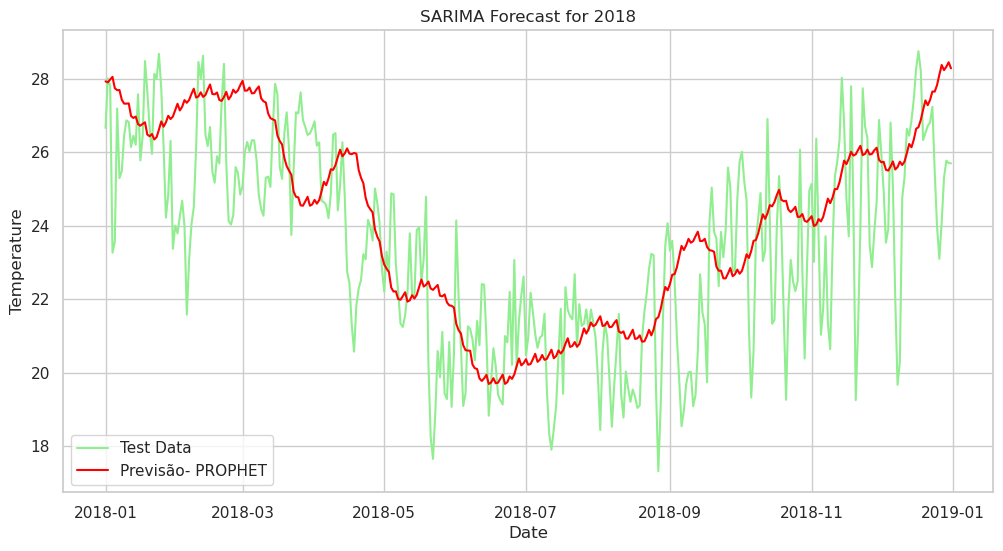

In [115]:
# Plotando as previsões e os dados reais
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data.values, label='Test Data',color= 'lightgreen')
plt.plot(test_data.index, pred['yhat'], label='Previsão- PROPHET', color='red')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('SARIMA Forecast for 2018')
plt.show()

**-PREVISÃO PARA O ANO DE 2019**

Agora uma previsão para o ano de 2019 com os dados treinados até 2018 usando o comando *make_future* do prophet para criar um período de 1 ano 

In [116]:
train_df= pd.DataFrame(daily_df['temperatura'])
train_df.reset_index(inplace=True)
train_df=train_df.rename(columns={'temperatura':'y','Data':'ds'})

prophet= Prophet()

prophet.add_seasonality(name='monthly', period=30.5, fourier_order=3)
prophet.add_seasonality(name='yearly', period=365.25, fourier_order=7)
prophet.fit(train_df)

# Criando um DataFrame com datas futuras para previsão de 1 ano (365 dias)
future = prophet.make_future_dataframe(periods=365, freq='D')

pred= prophet.predict(future).tail(365)

pred

18:02:29 - cmdstanpy - INFO - Chain [1] start processing
18:02:29 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1217,2019-01-01,23.266371,24.147813,29.544692,23.266371,23.266371,3.459549,3.459549,3.459549,0.165277,...,-0.115227,-0.115227,-0.115227,3.409499,3.409499,3.409499,0.0,0.0,0.0,26.725920
1218,2019-01-02,23.265168,24.498952,29.296685,23.265168,23.265168,3.609650,3.609650,3.609650,0.095404,...,0.101133,0.101133,0.101133,3.413113,3.413113,3.413113,0.0,0.0,0.0,26.874817
1219,2019-01-03,23.263964,24.329675,29.410458,23.263964,23.263964,3.529695,3.529695,3.529695,-0.022423,...,0.141786,0.141786,0.141786,3.410331,3.410331,3.410331,0.0,0.0,0.0,26.793659
1220,2019-01-04,23.262761,23.930500,28.948272,23.262761,23.262761,3.254107,3.254107,3.254107,-0.167334,...,0.020110,0.020110,0.020110,3.401331,3.401331,3.401331,0.0,0.0,0.0,26.516868
1221,2019-01-05,23.261558,23.911678,29.030372,23.261558,23.261558,3.085527,3.085527,3.085527,-0.307217,...,0.006388,0.006388,0.006388,3.386357,3.386357,3.386357,0.0,0.0,0.0,26.347085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,2019-12-27,22.833190,23.762638,28.676898,22.730240,22.953099,3.343569,3.343569,3.343569,0.039276,...,0.020110,0.020110,0.020110,3.284183,3.284183,3.284183,0.0,0.0,0.0,26.176759
1578,2019-12-28,22.831987,23.525023,28.630932,22.728244,22.952384,3.370581,3.370581,3.370581,0.042634,...,0.006388,0.006388,0.006388,3.321559,3.321559,3.321559,0.0,0.0,0.0,26.202568
1579,2019-12-29,22.830784,23.646631,28.662749,22.726248,22.951834,3.420007,3.420007,3.420007,0.068808,...,-0.001536,-0.001536,-0.001536,3.352735,3.352735,3.352735,0.0,0.0,0.0,26.250791
1580,2019-12-30,22.829581,23.678013,28.826167,22.724252,22.951285,3.337529,3.337529,3.337529,0.112653,...,-0.152653,-0.152653,-0.152653,3.377529,3.377529,3.377529,0.0,0.0,0.0,26.167109


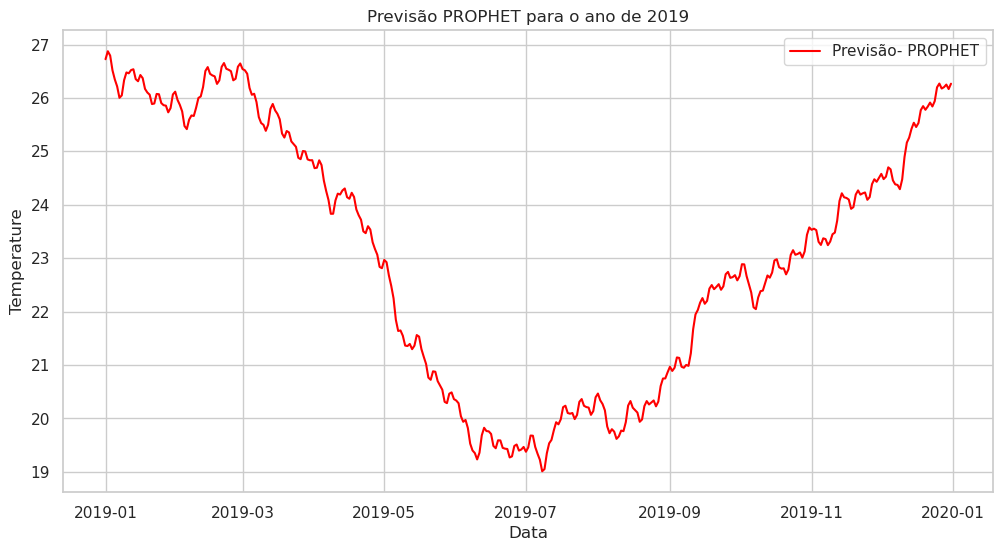

In [117]:
# Plotar as previsões e os dados reais
plt.figure(figsize=(12, 6))
plt.plot(future['ds'].tail(365), pred['yhat'], label='Previsão- PROPHET', color='red')
plt.legend()
plt.xlabel('Data')
plt.ylabel('Temperature')
plt.title('Previsão PROPHET para o ano de 2019')
plt.show()

**-CONCLUSÃO**

O modelo Prophet mostrou ser bastante  eficaz ao bater o resultado da baseline SARIMA. Evidente que o resultado poderia ser  ainda mais acurado se tivéssemos um dataset mais completo, sem tantos dados perdidos no tratamento. Além disso, na nossa análise, por se tratar de clima, fica muito fácil de observar um dos principais componentes de uma série temporal, a sazonalidade, que é pautada nesse caso nas estações do ano.